<a href="https://colab.research.google.com/github/Neel7317/Machine-Learning/blob/master/Use_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [58]:
df=pd.read_csv('data.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

#1 How the distribution of others with gender

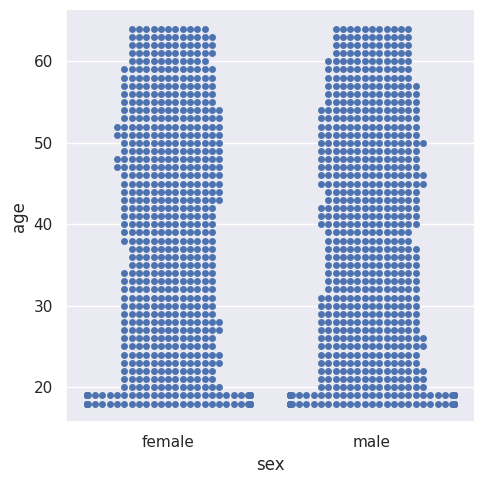

In [7]:
sns.catplot(data=df, x="sex", y="age", kind="swarm")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


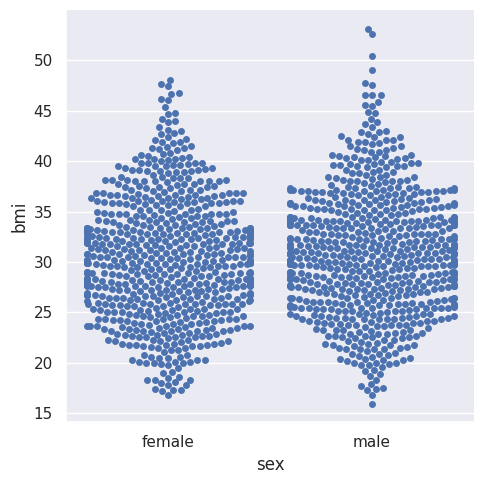

In [10]:
sns.catplot(data=df, x="sex", y="bmi", kind="swarm")

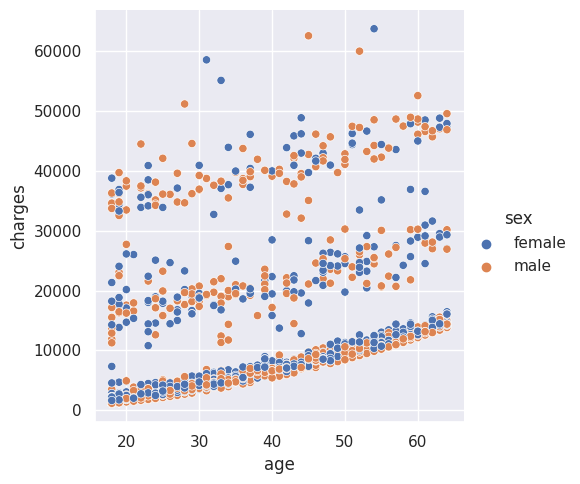

In [12]:
sns.relplot(data=df, x="age", y="charges",hue="sex")

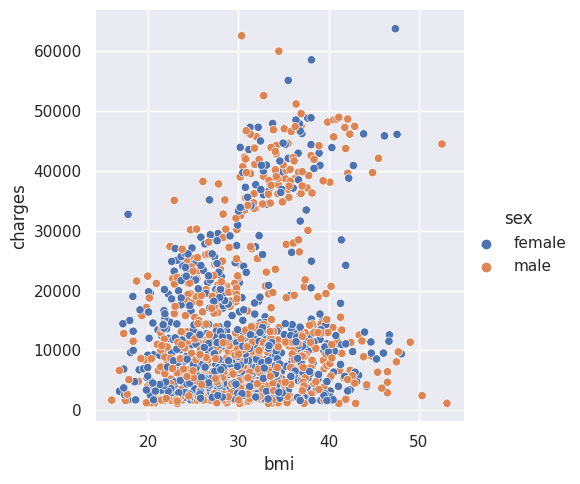

In [13]:
sns.relplot(data=df, x="bmi", y="charges",hue="sex")

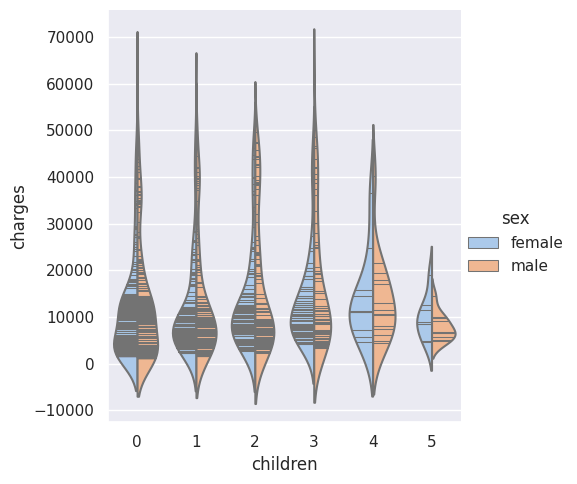

In [15]:
sns.catplot(
    data=df, x="children", y="charges", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
)

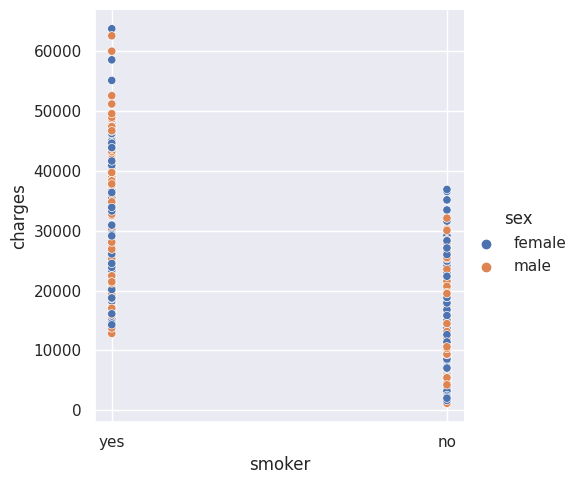

In [16]:
sns.relplot(data=df, x="smoker", y="charges",hue="sex")

#2. more children results in the fact that people smoke less?

In [ ]:
# counts Groupby value
df2 = df.groupby(['children', 'smoker']).size().unstack(fill_value=0)


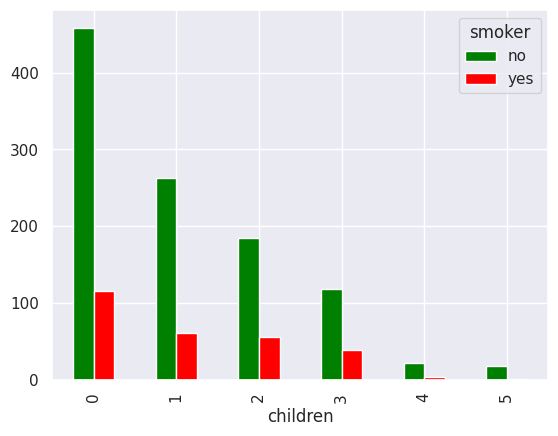

In [18]:
ax = df2.plot.bar(color={"yes": "red", "no": "green"})

#Note : from below chart we can say that when no of children increse smoker also very less.

#3. Which variable do you think effect the charges the most and why (prove it).

In [103]:
x_train.head()

,age,bmi,children,region,sex_female,sex_male,smoker_no,smoker_yes
195,19,30.590,0,2,0,1,1,0
64,20,22.420,0,2,1,0,0,1
1092,23,32.700,3,1,0,1,1,0
438,52,46.750,5,0,1,0,1,0
174,24,33.345,0,2,1,0,1,0


Feature: 0, Score: 0.12284
Feature: 1, Score: 0.18519
Feature: 2, Score: 0.01334
Feature: 3, Score: 0.00626
Feature: 4, Score: 0.00069
Feature: 5, Score: 0.00109
Feature: 6, Score: 0.35586
Feature: 7, Score: 0.31472


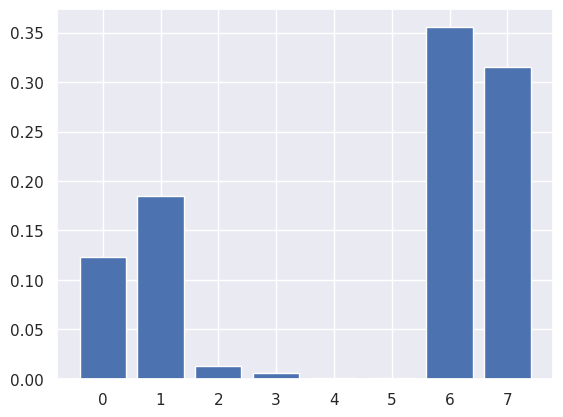

In [97]:
from matplotlib import pyplot

importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#smoker feature looks most important by random_forest_regressior

Feature: 0, Score: 0.01205
Feature: 1, Score: 0.01730
Feature: 2, Score: 0.00442
Feature: 3, Score: 0.00300
Feature: 4, Score: 0.00098
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.96224
Feature: 7, Score: 0.00000


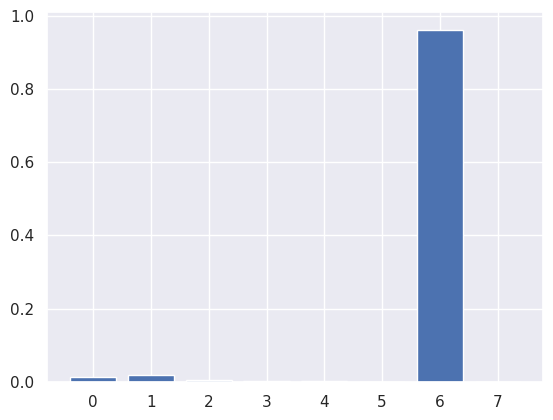

In [99]:
importance = xgb_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# **#looks same somker fearure is most important from xgboost model**

In [101]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=0fa21c7f22ed298dfeb2a22ba6b64c8ddffd3d3fcf1f096efa537f2a49055374
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [102]:
import eli5
eli5.show_weights(lasso_reg, top=-1, feature_names = x_train.columns.tolist())

#4. What can you say about the difference in distribution of charges for smokers and non smokers.

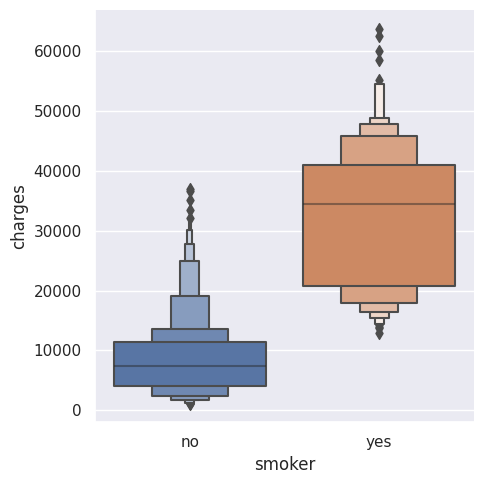

In [19]:
sns.catplot(
    data=df.sort_values("charges"),
    x="smoker", y="charges", kind="boxen",
)

# from this chart we can clearly see that avg charges for non-smokers is nearly 10-12k lesser then smokers.

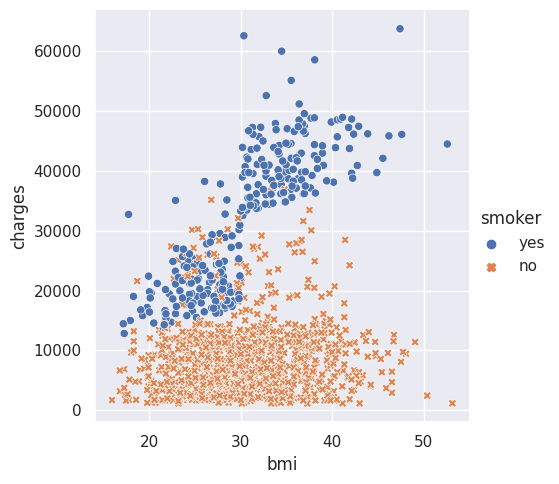

In [20]:
sns.relplot(
    data=df,
    x="bmi", y="charges", hue="smoker", style="smoker"
)

#5.How is BMI affecting the distribution of charges.

In [23]:
import scipy.stats as stats
rho, p_value = stats.spearmanr(df['bmi'], df['charges'])

print("Spearman correlation matrix:\n", rho)


Spearman correlation matrix:
 0.11939590358331145


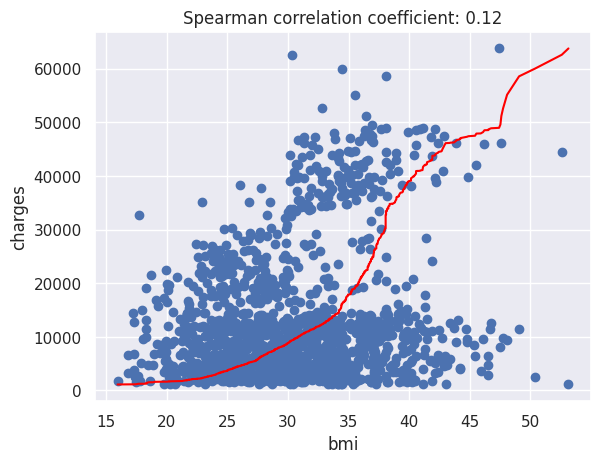

In [24]:
# Calculate the Spearman correlation coefficient
rho, p_value = stats.spearmanr(df['bmi'], df['charges'])

plt.scatter(df['bmi'], df['charges'])
plt.plot(np.sort(df['bmi']), np.sort(df['charges']), color='red')
plt.title("Spearman correlation coefficient: {:.2f}".format(rho))
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

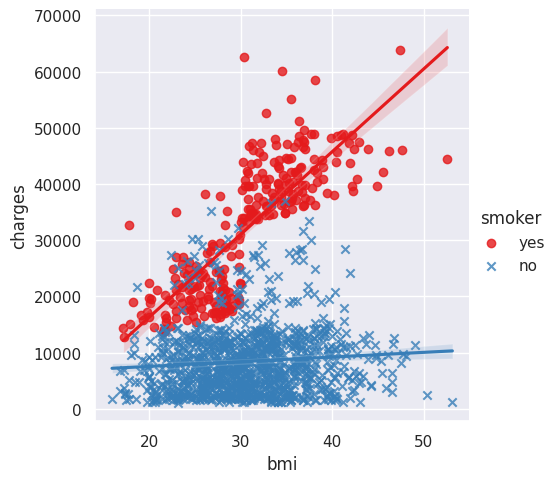

In [31]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df,
           markers=["o", "x"], palette="Set1");

#6. •	Plot the region wise distribution of charges based on other variables and draw the insights

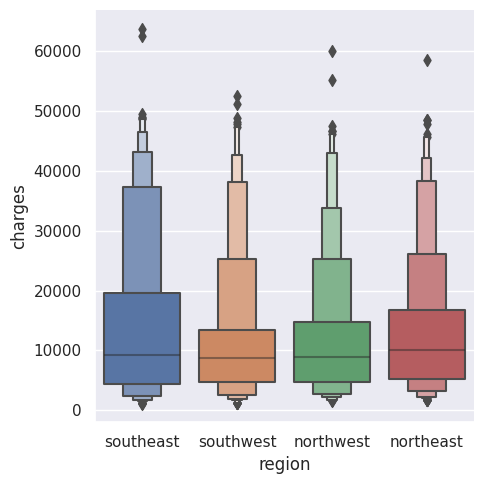

In [25]:

sns.catplot(
    data=df.sort_values("charges"),
    x="region", y="charges", kind="boxen",
)

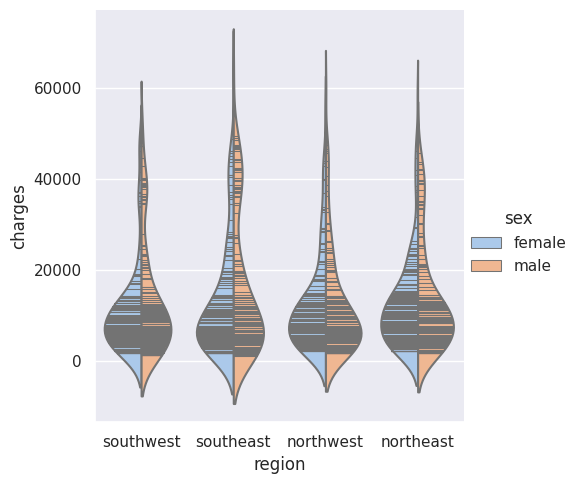

In [26]:
sns.catplot(
    data=df, x="region", y="charges", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
)

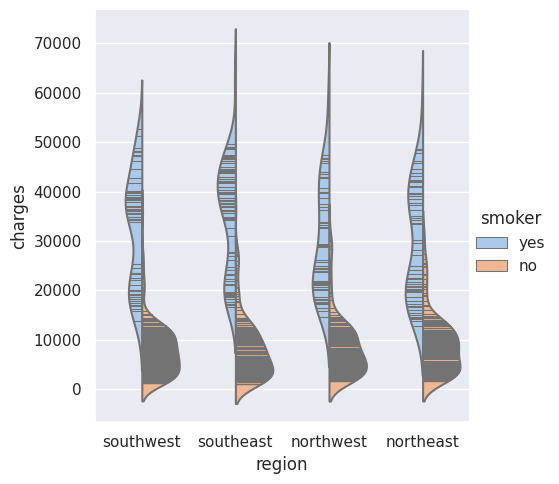

In [27]:
sns.catplot(
    data=df, x="region", y="charges", hue="smoker",
    kind="violin", inner="stick", split=True, palette="pastel",
)

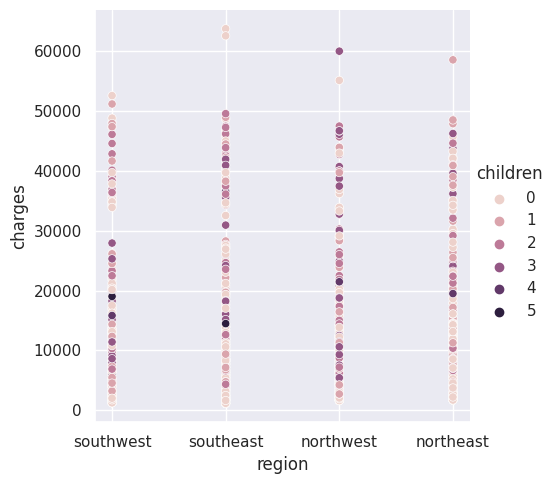

In [28]:
sns.relplot(
    data=df, x="region", y="charges", hue="children",
)

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [61]:
# apply get_dummies function
df = pd.get_dummies(df,columns=['sex'])
df .head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [62]:
df = pd.get_dummies(df,columns=['smoker'])
df .head()

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


In [64]:
labelencode={
    'southeast':0,
    'southwest':1,
    'northwest':2,
    'northeast':3,

}
df['region']=df.region.map(labelencode)

In [65]:
df

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,16884.92400,1,0,0,1
1,18,33.770,1,0,1725.55230,0,1,1,0
2,28,33.000,3,0,4449.46200,0,1,1,0
3,33,22.705,0,2,21984.47061,0,1,1,0
4,32,28.880,0,2,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,2,10600.54830,0,1,1,0
1334,18,31.920,0,3,2205.98080,1,0,1,0
1335,18,36.850,0,0,1629.83350,1,0,1,0
1336,21,25.800,0,1,2007.94500,1,0,1,0


In [67]:
X=df[['age','bmi','children','region','sex_female','sex_male','smoker_no','smoker_yes']]
Y=df['charges']

In [68]:
X.head()

,age,bmi,children,region,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,1,0,0,1
1,18,33.770,1,0,0,1,1,0
2,28,33.000,3,0,0,1,1,0
3,33,22.705,0,2,0,1,1,0
4,32,28.880,0,2,0,1,1,0


In [69]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
								random_state=0,
                max_depth=6,
                min_samples_leaf=3,
                min_samples_split=9)


regressor.fit(x_train, y_train)


In [75]:
# test the output by changing values
Y_pred = regressor.predict(x_test)


In [78]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print("MSE = ",mean_squared_error(y_test, Y_pred))
print("MAE = ",mean_absolute_error(y_test, Y_pred))
print("MAPE = ",mean_absolute_percentage_error(y_test, Y_pred))
print("r2 = ",r2_score(y_test, Y_pred))

MSE =  17814716.205937922
MAE =  2345.3188104708784
MAPE =  0.26178066576332104
r2 =  0.8801479655870373


In [79]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.1)

In [80]:
y_redge_pred=ridge_reg.predict(x_test)

In [81]:
print("MSE = ",mean_squared_error(y_redge_pred, Y_pred))
print("MAE = ",mean_absolute_error(y_redge_pred, Y_pred))
print("MAPE = ",mean_absolute_percentage_error(y_redge_pred, Y_pred))
print("r2 = ",r2_score(y_redge_pred, Y_pred))

MSE =  19298754.912857477
MAE =  3259.1613479201264
MAPE =  0.6072407950465772
r2 =  0.8474425795815167


In [82]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=3.13)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.13)

In [83]:
y_lasso_pred=lasso_reg.predict(x_test)

In [84]:
print("MSE = ",mean_squared_error(y_lasso_pred, Y_pred))
print("MAE = ",mean_absolute_error(y_lasso_pred, Y_pred))
print("MAPE = ",mean_absolute_percentage_error(y_lasso_pred, Y_pred))
print("r2 = ",r2_score(y_lasso_pred, Y_pred))

MSE =  19286380.40349224
MAE =  3258.4396876010333
MAPE =  0.6214840077130525
r2 =  0.8473756135950073


In [85]:
import xgboost
print(xgboost.__version__)

1.7.6


In [87]:
from xgboost import XGBRegressor

In [89]:
xgb_reg=XGBRegressor(n_estimators=23,max_depth=6,eta=0.2,reg_lambda=1,gamma=0,subsample=1,min_child_weight=1,scale_pos_weight=1)

In [92]:
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=23, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [93]:
y_pred_xgb=xgb_reg.predict(x_test)

In [94]:
print("MSE = ",mean_squared_error(y_pred_xgb, Y_pred))
print("MAE = ",mean_absolute_error(y_pred_xgb, Y_pred))
print("MAPE = ",mean_absolute_percentage_error(y_pred_xgb, Y_pred))
print("r2 = ",r2_score(y_pred_xgb, Y_pred))

MSE =  1638637.6255423236
MAE =  877.7752893797115
MAPE =  0.10029722806471264
r2 =  0.9874075973940535


Benchmark Table
                                 
                                      r2_value        MAPE




```
1.   Xgboost                       0.98           0.10

2.   Random_Forest                 0.88           0.26

3.   Ridge_regression              0.84           0.60

4.   Lasso                         0.84           0.62
```




### --> **Note** : All parametr for model is selected after hyper-parameter search